# Regularization (Ridge and Lasso)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import Wine dataset from UCIML

In [103]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# fetch dataset (wine)
dataset = fetch_ucirepo(id=186)

In [335]:
# data (as pandas dataframes)
#print(dataset)
X = dataset.data.features.to_numpy()
y = dataset.data.targets.to_numpy().reshape(-1)

#y = pd.get_dummies(dataset.data.targets, columns=['Class'])

# Initialize LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(dataset.data.targets['Class'].to_numpy().reshape(-1))

print(f'X.type:{type(X)} y.type:{type(y)}')
print(f'X.shape:{X.shape} y.shape:{y.shape}')

X.type:<class 'numpy.ndarray'> y.type:<class 'numpy.ndarray'>
X.shape:(6497, 11) y.shape:(6497,)


In [336]:
train_last_index = int(len(X) * 0.8)

X_train = X[0:train_last_index]
y_train = y[0:train_last_index]

X_test = X[train_last_index:]
y_test = y[train_last_index:]

print(f'{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}')

(5197, 11) (5197,) (1300, 11) (1300,)


In [509]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet

alpha = 0.2
eta0 = 0.000005
max_iter = 1500

vanilla = SGDRegressor(penalty=None, eta0=eta0, max_iter=max_iter)
ridge = SGDRegressor(penalty="l2", alpha=alpha, eta0=eta0, random_state=42, max_iter=max_iter)
lasso = SGDRegressor(penalty="l1", alpha=alpha, eta0=eta0, random_state=42, max_iter=max_iter)
elastic = SGDRegressor(penalty="elasticnet", alpha=alpha, eta0=eta0, random_state=42, max_iter=max_iter)

In [510]:
def fit_predict_and_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = model.score(X_test, y_test)
    print(f'{type(model)} score:{score}')
    return prediction, score


In [511]:
vanilla_predict, vanilla_score = fit_predict_and_score(vanilla, X_train, y_train, X_test, y_test)


<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> score:0.039321568472231894


In [512]:
ridge_predict, ridge_score = fit_predict_and_score(ridge, X_train, y_train, X_test, y_test)

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> score:0.03607739419839362


In [513]:
lasso_predict, lasso_score = fit_predict_and_score(lasso, X_train, y_train, X_test, y_test)

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> score:0.00650446754172318


In [514]:
elastic_predict, elastic_score = fit_predict_and_score(elastic, X_train, y_train, X_test, y_test)

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> score:0.03182809452980817


## Compare scores

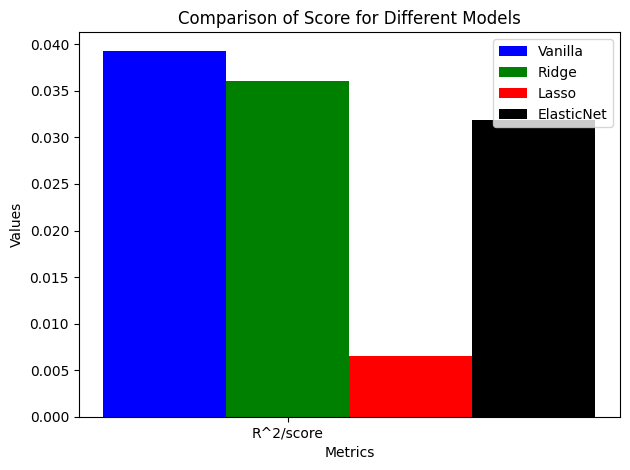

In [518]:
metrics = ['R^2/score']
models = ['Vanilla', 'Ridge', 'Lasso', 'ElasticNet']
colors = ['b', 'g', 'r', 'black']

scores = np.array([
    vanilla_score,
    ridge_score,
    lasso_score,
    elastic_score
])

bar_width = 0.2
index = np.arange(len(metrics))
fig, ax = plt.subplots()

bar_positions = [index + i * bar_width for i in range(len(models))]


for i, model_metrics in enumerate(scores):
    ax.bar(bar_positions[i], model_metrics, bar_width, color=colors[i], label=models[i])

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Score for Different Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()